# Imports

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import cv2
from PIL import Image

# Definitions

In [2]:
img_file = (
    "/Users/richardcollins/palette-able-images/data/test_images/jonny_cropped.jpg"
)

# Functions

In [3]:
def resize_image_cv2(img_file, dims):
    img = cv2.imread(img_file)
    print("Original Dimensions: {}".format(img.shape))
    resized = cv2.resize(img, dims, interpolation=cv2.INTER_AREA)
    print("Resized Dimensions: {}".format(resized.shape))
    return resized


def resize_image_pillow(img, dims):
    print("Original Dimensions: {}".format(img.size))
    resized = img.resize(dims)
    print("Resized Dimensions: {}".format(resized.size))
    return resized


def reduce_colours(img, nColours):
    image_pbn = img.convert("P", palette=Image.ADAPTIVE, colors=nColours)
    # image_pbn.save("/Users/richardcollins/Desktop/jonny/images/jonny_cropped_resized_pbn.png")
    # image_pbn.show()
    return image_pbn


def get_palette_info(img):
    palette_colours = img.getcolors()
    # print(palette_colours)
    imgRGB = img.convert("RGB")
    rgb_colours = imgRGB.getcolors()
    # print(rgb_colours)
    palette_info_dict = {c: [] for c in ["colourID", "frequency", "r", "g", "b"]}
    for palette_freq, palette_colour in palette_colours:
        for rgb_freq, rgb_colour in rgb_colours:
            if palette_freq != rgb_freq:
                continue

            palette_info_dict["colourID"].append(palette_colour)
            palette_info_dict["frequency"].append(rgb_freq)
            for i, colour in enumerate(["r", "g", "b"]):
                palette_info_dict[colour].append(rgb_colour[i])
    palette_info_df = pd.DataFrame(palette_info_dict)
    ### Generate example images
    """w, h = 512, 512
    for palette_colour, rgb_colour in palette_info.items():
        r, g, b = rgb_colour[0], rgb_colour[1], rgb_colour[2]
        data = np.zeros((h, w, 3), dtype=np.uint8)
        data[:, :] = [r, g, b]  # red patch in upper left
        img = Image.fromarray(data, "RGB")
        img.save(
            "/Users/richardcollins/Desktop/jonny/images/palette/colour{0}_rgb{1}.png".format(
                palette_colour, rgb_colour
            )
        )"""
    return palette_info_df


def quantise_to_palette(img, palette):
    """Quantize image to a given palette.

    The input image is expected to be a PIL Image.
    The palette is expected to be a list of no more than 256 R,G,B values."""

    e = len(palette)
    assert e > 0, "Palette unexpectedly short"
    assert e <= 768, "Palette unexpectedly long"
    assert e % 3 == 0, "Palette not multiple of 3, so not RGB"

    # Make tiny, 1x1 new palette image
    p = Image.new("P", (1, 1))

    # Zero-pad the palette to 256 RGB colours, i.e. 768 values and apply to image
    palette += (768 - e) * [0]
    p.putpalette(palette)

    # Now quantize input image to the same palette as our little image
    return img.convert("RGB").quantize(palette=p)

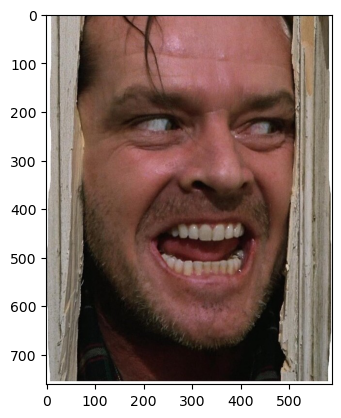

In [4]:
original = Image.open(img_file)
plt.imshow(original)
plt.show()

In [5]:
resized = resize_image_pillow(img=original, dims=(100, 140))

Original Dimensions: (588, 761)
Resized Dimensions: (100, 140)


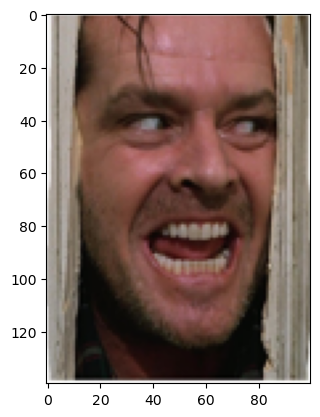

In [6]:
plt.imshow(resized)
plt.show()

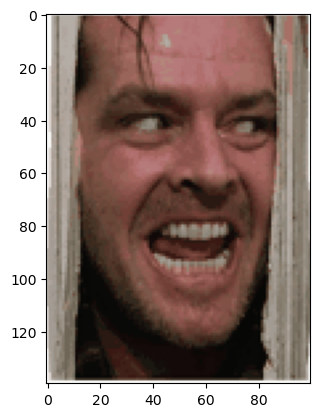

In [7]:
image_pbn = reduce_colours(img=resized, nColours=60)
plt.imshow(image_pbn)
plt.show()

In [8]:
get_palette_info(img=image_pbn).sort_values("frequency", ascending=False)

,colourID,frequency,r,g,b
75,57,492,9,10,8
69,53,428,42,25,18
42,32,331,129,81,70
32,24,330,130,119,104
12,9,322,182,122,122
...,...,...,...,...,...
68,52,148,58,24,19
53,40,146,94,70,56
6,4,129,174,160,148
11,8,118,179,133,123


In [9]:
np.array(image_pbn.getpalette()).reshape(256,3)

array([[248, 248, 247],
       [220, 213, 210],
       [180, 173, 166],
       [176, 166, 158],
       [174, 160, 148],
       [167, 158, 149],
       [161, 155, 147],
       [157, 148, 137],
       [179, 133, 123],
       [182, 122, 122],
       [151, 141, 129],
       [151, 131, 113],
       [142, 135, 123],
       [137, 128, 114],
       [136, 124, 109],
       [130, 123, 109],
       [179, 117, 117],
       [176, 110, 108],
       [166, 112, 103],
       [163, 105,  97],
       [165, 101,  95],
       [153, 100,  89],
       [155,  93,  87],
       [147,  91,  82],
       [130, 119, 104],
       [132, 108,  94],
       [119, 112,  97],
       [112, 102,  88],
       [140,  92,  80],
       [140,  87,  78],
       [123,  88,  74],
       [139,  82,  75],
       [129,  81,  70],
       [122,  81,  66],
       [115,  79,  64],
       [126,  74,  65],
       [113,  74,  60],
       [117,  69,  59],
       [114,  63,  54],
       [104,  71,  56],
       [ 94,  70,  56],
       [101,  63

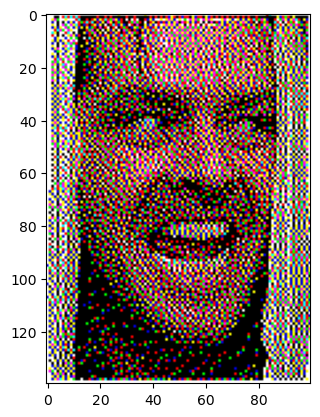

In [10]:
new_palette = list(
    np.array([[0, 0, 0], [0, 0, 225], [0, 255, 0], [255, 0, 0], [0, 255, 255], [255, 0, 255], [255, 255, 0], [255, 255, 255]]).flatten()
)
image_new_palette = quantise_to_palette(img=resized, palette=new_palette)
plt.imshow(image_new_palette)
plt.show()

In [11]:
get_palette_info(img=image_new_palette)

,colourID,frequency,r,g,b
0,0,4198,0,0,0
1,1,1870,0,0,225
2,2,1131,0,255,0
3,3,2247,255,0,0
4,4,434,0,255,255
5,5,846,255,0,255
6,6,1877,255,255,0
7,7,1397,255,255,255


In [12]:
pd.DataFrame(np.array(image_new_palette))

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
1,7,7,7,0,0,7,3,4,3,4,...,2,3,0,6,0,0,0,0,0,7
2,7,7,6,5,2,7,7,6,7,7,...,6,1,6,5,4,3,0,6,1,7
3,7,7,1,7,0,7,0,7,1,6,...,7,3,2,3,7,2,1,0,3,7
4,7,7,6,7,0,7,5,2,7,5,...,0,6,5,2,5,3,2,3,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,7,5,2,7,0,6,1,6,1,6,...,4,3,4,3,4,0,6,1,6,7
136,7,7,1,6,5,2,5,0,7,0,...,5,2,5,2,3,1,6,1,7,7
137,7,7,6,1,6,1,6,1,6,1,...,7,1,6,0,7,0,7,0,7,7
138,7,7,1,6,5,4,6,1,6,7,...,0,7,0,7,0,7,0,7,6,7
